In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erf

In [4]:
def reference(n,q,x):
    delta_tilde=np.sqrt(2*np.pi/(2*q))
    return 1-(erf(delta_tilde/(2*np.sqrt(2)*x)))**(2*n)

def y_err(p, NUM_MAX):
        
    return np.sqrt(p*(1-p)/NUM_MAX)

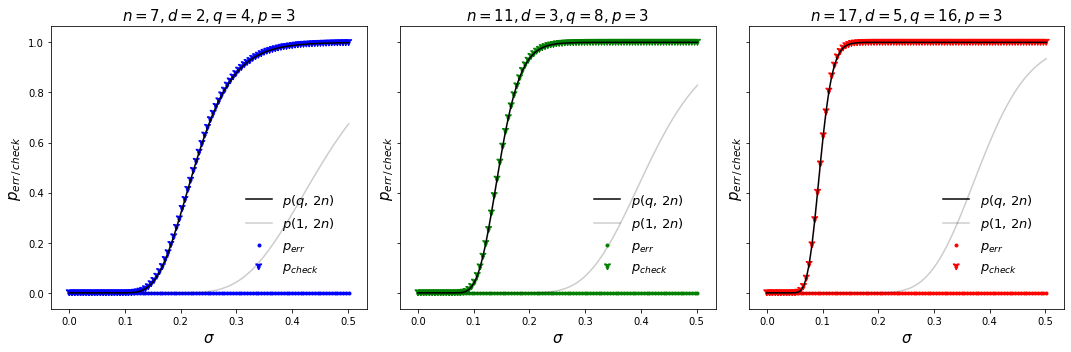

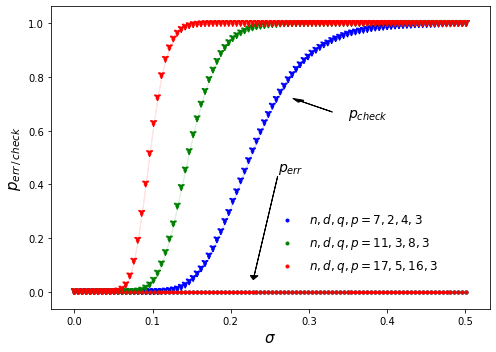

In [49]:
hinv=1
p3=1
decoder="BAB"

indicator=int(2*hinv+p3)

folders=["results", "results_p3", "results_hinv", "results_hinv_p3"]

Ps=[[3],[5],[7]]
if p3:
    Ps=[[3]]*3
Qs=[4,8,16]
Ns=[7,11,17]
Ds=[2,3,5]
cols=['b','g','r','c']
NUM_MAX=int(1e5)


sigmas=np.linspace(1e-7,0.2,100)

fig, axs = plt.subplots(1,3, sharey=True, figsize=(15,5))
for i in range(len(Ns)):
    n,q,p,d=Ns[i], Qs[i], np.prod(np.asarray(Ps[i])), Ds[i]
    prefix="opt"
    path=folders[indicator]
    data=np.genfromtxt("../Numerics/%s/NTRU_sim_%s_%s_n%i_q%i_p%i_d%i_NMAX100000.txt" % (path, decoder, prefix, n, q, p, d))
    
    #plt.figure("%i"%(i), figsize=(7,5))
    yerr=[y_err(p,NUM_MAX) for p in data[1]]
    x,y,yerr=np.asarray(data[0]*np.sqrt(2*np.pi)),np.asarray(data[1]),np.asarray(yerr)
    #plt.errorbar(data[0], data[1],yerr=yerr,ecolor='blue', elinewidth=1, capsize=0, label=r'$p_{err}$')
    
    axs[i].fill_between(x, y-yerr, y+yerr,
    alpha=0.2, edgecolor=cols[i], facecolor=cols[i])
    axs[i].scatter(x,y,marker='.', label=r'$p_{err}$',color=cols[i])
    yerr_c=[y_err(p_c,NUM_MAX) for p_c in data[2]]
    
    x_c,y_c,yerr_c=np.asarray(data[0]*np.sqrt(2*np.pi)),np.asarray(data[2]),np.asarray(yerr)
    axs[i].fill_between(x_c, y_c-yerr_c, y_c+yerr_c,
    alpha=0.1, edgecolor=cols[i], facecolor=cols[i])
    axs[i].scatter(x_c, y_c,marker='v', color=cols[i],linestyle='dashed', label='$p_{check}$')

    
    #plt.plot(data[0]*np.sqrt(2*np.pi), data[3], label='$p_{Babai}$')
    axs[i].plot(data[0]*np.sqrt(2*np.pi), reference(n,q, data[0]*np.sqrt(2*np.pi)),color='k', label='$p(q,\, 2n)$')
    axs[i].plot(data[0]*np.sqrt(2*np.pi), reference(n,1, data[0]*np.sqrt(2*np.pi)),color='k',alpha=0.2, label='$p(1,\, 2n)$')
    axs[i].set_title(r"$n=%i,d=%i, q=%i, p=%i$"%(n,d,q,p), fontsize=15)
    axs[i].set_xlabel(r'$\sigma$', fontsize=15)
    axs[i].set_ylabel(r'$p_{err\,/\,check}$', fontsize=15)
    axs[i].legend(loc=(0.6,0.1), fontsize=13, frameon=False)
plt.tight_layout()
plt.savefig("NTRU_sim_%s_hinv%i_p3%i.pdf" % (decoder, hinv, p3))
#plt.show()
    
    
    
plt.figure("plotall",figsize=(7,5))
for i in list(range(len(Ns))):
    n,q,p,d=Ns[i], Qs[i], np.prod(np.asarray(Ps[i])), Ds[i]
    prefix="opt"
    path=folders[indicator]
    data=np.genfromtxt("../Numerics/%s/NTRU_sim_%s_%s_n%i_q%i_p%i_d%i_NMAX100000.txt" % (path, decoder, prefix, n, q, p, d))
    
    
    yerr=[y_err(p,NUM_MAX) for p in data[1]]
    x,y,yerr=np.asarray(data[0]*np.sqrt(2*np.pi)),np.asarray(data[1]),np.asarray(yerr)
    
    if i==0:
        bd=plt.scatter(x,y,marker='.', color=cols[i], label=r'$n,d, q, p=%i,%i,%i, %i$'%(n,d,q,p))
    else:
        plt.scatter(x,y,marker='.', color=cols[i], label=r'$n,d, q, p=%i,%i,%i, %i$'%(n,d,q,p))
    plt.fill_between(x, y-yerr, y+yerr,
    alpha=0.2, edgecolor=cols[i], facecolor=cols[i])
    
    yerr_c=[y_err(p_c,NUM_MAX) for p_c in data[2]]
    x_c,y_c,yerr_c=np.asarray(data[0]*np.sqrt(2*np.pi)),np.asarray(data[2]),np.asarray(yerr_c)
    
    if i==0:
        bp=plt.scatter(x_c, y_c,marker='v',color=cols[i],linestyle='dashed')
    else:
        plt.scatter(x_c, y_c,marker='v',color=cols[i],linestyle='dashed')
    plt.fill_between(x_c, y_c-yerr_c, y_c+yerr_c,
    alpha=0.1, edgecolor=cols[i], facecolor=cols[i])
    
    

#plt.legend([bd, bp], [r'$p_{err}$', r'$p_{check}$'], loc=(0.5,0.3), frameon=False)

plt.legend(loc=(0.5,0.1), fontsize=12, frameon=False)
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel(r'$\sigma$', fontsize=15)
plt.ylabel(r'$p_{err\,/\,check}$', fontsize=15)

if decoder=="NTRU":
    plt.text(0.35,0.65, r'$p_{err}$', fontsize=14)
    plt.text(0.26,0.45, r'$p_{check}$', fontsize=14)
else:
    plt.text(0.35,0.65, r'$p_{check}$', fontsize=14)
    plt.text(0.26,0.45, r'$p_{err}$', fontsize=14)
plt.arrow(0.35-0.02,0.65+0.02, -0.04,0.04, width=0.0001,head_width=0.01, fc='k', ec='k')
plt.arrow(0.26,0.45-0.02, -0.03,-0.37, width=0.0001,head_width=0.01, fc='k', ec='k')
#plt.xlim(0,0.1)
#plt.ylim(0,0.005)

plt.tight_layout()
plt.show()
#plt.savefig("NTRUDEC_plotall_%s_hinv%i_p3%i.pdf"%(decoder, hinv, p3))
